# Statistics 2550 Final Project

## Hayden Copenhafer U1113702

## Problem 1:

In [90]:
#boilerplate
%matplotlib inline
import matplotlib.pyplot as plt #plotting and graphing package
import numpy as np #math package
%config InlineBackend.figure_format='svg' #increases graph resolution
from scipy import stats #statistics package with lots of useful functionality
from scipy.stats import f_oneway #python package routine which performs ANOVA
from scipy.stats import bootstrap #python packae that performs bootstrap method
import statsmodels.api as sm
import pandas as pd
import seaborn as sb
from scipy.stats import ttest_ind

The strategy I will use to arrive at a solution for this problem will be ANOVA. If we had two groups to analyze, we would be able to perform a t-test, however, since there are data for three streets' revenues, we will have to find an answer through analysis of variance instead. This will help me find if the difference in means for each street's mean revenue is statistically significant or not. 

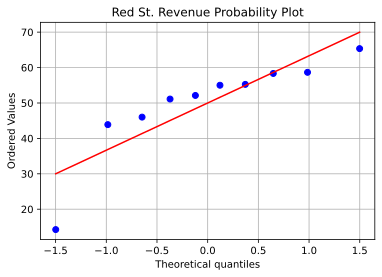

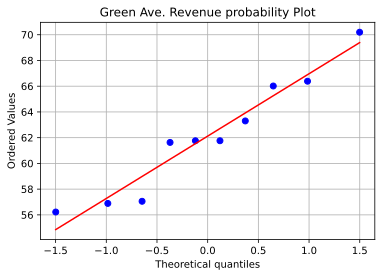

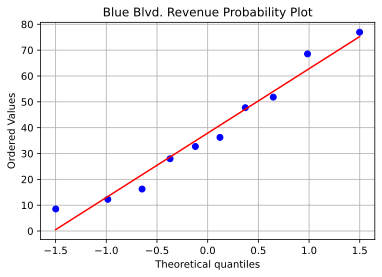

[55.00997723 52.1269292  14.255201   65.3525224  55.25508781 58.6589685
 58.337698   43.88984484 51.11244939 46.00799271]
[66.38599119 70.19352862 57.05351481 56.21895255 61.7578537  61.6281679
 66.01286256 61.75894544 63.29887575 56.88762895]


In [120]:
#red street
redgross=[150.5351212,153.9897186,118.6883806,157.8531715,143.5374477,158.918558,159.3202353,134.6448469,150.7459199,
          143.3893716] #red street gross earnings
redexp=[95.52514397,101.8627894,104.4331796,92.5006491,88.28235989,100.2595895,100.9825373,90.75500206,99.63347051,
        97.38137889] #red street expenses
redrev=np.subtract(redgross,redexp) #numpy.subtract differences each element of two lists

#green avenue
greengross=[152.7694028,159.2396793,147.7983911,144.5890126,151.7581488,148.8729397,152.8886957,149.7831249,
            152.9227463,150.3004702]
greenexp=[86.38341161,89.04615068,90.74487629,88.37006005,90.0002951,87.2447718,86.87583314,88.02417946,89.62387055,
          93.41284125]
greenrev=np.subtract(greengross,greenexp)

#blue boulevard
bluegross=[106.2475712,100.8588732,120.0535778,160.687559,131.2666914,134.087854,142.8645406,133.0047908,163.246996,
           137.4769152]
blueexp=[93.98089945,92.31841544,103.8089799,92.15022528,103.2954657,97.85292419,95.14315176,100.2921058,86.3152119,
         85.65910321]
bluerev=np.subtract(bluegross,blueexp)

pp1=stats.probplot(redrev,plot=plt)
plt.title('Red St. Revenue Probability Plot')
plt.grid()
plt.show()
pp2=stats.probplot(greenrev,plot=plt)
plt.title('Green Ave. Revenue probability Plot')
plt.grid()
plt.show()
pp3=stats.probplot(bluerev,plot=plt)
plt.title('Blue Blvd. Revenue Probability Plot')
plt.grid()
plt.show()
print(redrev)
print(greenrev)

In [123]:
print((redrev[2]-redmu)/np.std(redrev))
print(np.std(redrev))

-2.6870724667374555
13.302754782568567


$$
Z=\frac{X-\mu}{\sigma}
$$

$$
Z=\frac{14.255-50}{13.303}=\boxed{-2.687}
$$


Since the outlier is within 3$\sigma$ of the mean, we can still include it in the dataset.

In [3]:
redmu=sum(redrev)/len(redrev) #mean revenue is the sum of revenue values divided by the number of values
greenmu=sum(greenrev)/len(greenrev) #sum and length of list are used for calc
bluemu=sum(bluerev)/len(bluerev)
print(redmu,greenmu,bluemu) #print off mean values to make sure they  ake sense

50.000667108 62.119632147000004 37.897888657


| Street     	| Net Profit (x$1k) 	|
|------------	|-------------------	|
| Red St.    	| 50.0007           	|
| Green Ave. 	| 62.1196           	|
| Blue Blvd. 	| 37.8979           	|

In [98]:
f_oneway(redrev,greenrev,bluerev) #perform ANOVA against all 3 street's revenue data

F_onewayResult(statistic=5.801191454976646, pvalue=0.00801900109406362)

Performing ANOVA on our dataset reveals that there is a statistically significant difference in mean revenues between the revenues of at least two of the streets. A p value of 0.008 means that there is a 0.8% chance that the variance observed in the means is due to chance. Even with a low $\alpha$ of 0.01 to reduce the chances of a type 1 error, we can still reject the null hypothesis and conclude with confidence that the difference in revenues by area is statistically significant between at least two samples.

In order to verify that our highest mean revenue on green street is statistically significant, we can perform two t-tests between green avenue and both of the other streets.

In [112]:
print('Difference in means T-test for Green Ave. vs. Red St.:') #print header so we know what were looking at
t,p=ttest_ind(redrev,greenrev) #perform difference in means t test for red st and green ave
print(f"t-statistic:{t}") #show the t stat and p value with the preceding text
print(f"p-value:{p}")
print()
print('Difference in means T-test for Green Ave. vs. Blue Blvd.:')
t,p=ttest_ind(bluerev,greenrev) #repeat process for greed ave and blue blvd
print(f"t-statistic:{t}")
print(f"p-value:{p}")

print()
print('The variances for green, red, and blue respectively are:')
print(np.std(greenrev)**2,np.std(redrev)**2,np.std(bluerev)**2)

Difference in means T-test for Green Ave. vs. Red St.:
t-statistic:-2.5982933224639466
p-value:0.018164424056628426

Difference in means T-test for Green Ave. vs. Blue Blvd.:
t-statistic:-3.231367292694629
p-value:0.004631612179151437

The variances for green, red, and blue respectively are:
18.82974199479563 176.96328480515086 486.85594448319017


Since we have unequal variances, we have to use a two sample t test for samples with unequal variances:

$$
t=\frac{\bar{x}_1-\bar{x}_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_1^2}{n_1}}}
$$

In [108]:
tgreenred=(greenmu-redmu)/(np.sqrt((np.std(greenrev)**2/len(greenrev))+(np.std(redrev)**2/len(greenrev))))

tgreenblue=(greenmu-bluemu)/(np.sqrt((np.std(greenrev)**2/len(greenrev))+(np.std(bluerev)**2/len(bluerev))))

print('df:',len(greenrev)+len(bluerev)-2)

print('Green & Red t value:',tgreenred,'Green & Blue t value:',tgreenblue)

print('Green & Red p value: 0.013491','Green & Blue p value: 0.003149' )

df: 18
Green & Red t value: 2.738841642730805 Green & Blue t value: 3.4061602004956675
Green & Red p value: 0.013491 Green & Blue p value: 0.003149


| Street Comparison        	| t value 	| p value 	|
|--------------------------	|---------	|---------	|
| Green Ave vs. Red St.    	| 2.739   	| 0.01349 	|
| Green Ave. vs Blue Blvd. 	| 3.406   	| 0.00315 	|

Our p values are both below the $\alpha$ cutoff of 0.05 meaning we can reject the null hypothesis and conclude that the highest average revenue on Green Ave is statistically significant. This provides solid evidence that opening our business on Green Ave will give us the best chances of turning a high profit.

## Problem 2:

In [13]:
#egg supply co 1
supp1=[3.495359602,3.133042259,4.412908037,4.101882105,5.643409569,4.883097872,4.563709882,3.907850654,3.800721367,
       3.346519214,4.245140675,4.408865528,3.998446931,5.739250236,4.102860724,6.1971791,5.428360565,3.922114436,
       2.444018953,4.20234815,4.500825324,4.29909531,6.242600501,4.01153155,5.265619222,3.589319618,4.177415192,4.362818499,
       3.944637769,4.009245681,5.040541836,5.544954047,6.873900104,6.310908682,5.351834622,4.27355966,3.050565068,
       2.581019841,3.919199601,4.286100629,3.180475858,3.311965813,5.720767557,3.263777645,4.397890215,3.904810016,
       5.864399078,3.600430281,4.853260268,4.483602567,2.511039986,4.49359265,4.904979816,4.820280686,4.963136457,
       4.035181656,5.200986353,4.757569336,2.448698952,3.554434454,3.49943124,3.58472628,3.60008539,4.626769321,4.457263594,
       4.486071114,4.713169402,5.108731256,3.99294964,3.897793134,2.800759969,3.129415681,4.962159123,5.120648095,
       4.005477428,2.121200875,4.531895514,4.312024421,4.718169718,4.848638101,3.436817168,2.425330135,4.63579249,
       4.487429833,5.924069075,5.931661964,5.16964154,3.700705839,6.612493591,4.103734818,3.655869965,2.919430428,
       4.082363108,3.669983866,3.765994661,4.506619278,5.348309593,6.78425502,4.179166305,4.462320328,5.089359229,
       2.979968401,3.812130293,4.805829602,6.305099995,4.956514598,4.484742719,2.395606597,3.164602811,4.984215413,
       2.661050476,4.723901343,3.114477873,5.016519809,3.676663686,4.91213834,3.113460397,1.713805162,5.220247352,
       3.717951646,4.739681991,4.065134508,3.868516938,4.631654257,4.558223015,2.796573004,3.756084388,4.92147191,
       3.880163491,3.448139384,4.023638344,5.137409263,3.942029455,3.958566935,5.780303704,3.508731323,3.122783063,
       4.185686534,2.68650368,5.347729787,3.943642617,2.221262542,3.063678049,3.602233968,5.0215163,4.717434475,
       4.455078161,3.782892281,5.651138882,2.71619228,3.44159202,3.661151595,4.722261466,3.960328549,2.617360744,
       3.996225527,6.208225354,4.092360212,5.190208788,3.269334772,4.516202597,5.995567876,3.472509999,2.00186157,
       6.468168605,3.995692156,1.438063331,3.609206744,4.995427957,4.274427527,4.57065371,4.776062056,3.028730227,
       4.355615382,3.257635955,3.284932373,1.74934332,3.12876731,3.328408422,3.869532826,4.815411852,5.752027491,
       5.353030018,3.188422672,4.312616716,5.633843982,4.769774387,3.003461469,2.667895426,3.272586608,4.543661857,
       3.723274545,4.246620576,2.936107369,3.45791644,3.526155709,3.253395046,4.532603684,4.029740272,3.826031424,
       4.080792975,3.338893717,5.056453136,4.138853649,5.817669189,5.150668525,3.866048018,5.500176021,3.567149073,
       4.478522106,4.628319618,4.255399163,5.141942786,4.483946069,3.895377041,3.715534482,5.167793336,2.444512902,
       3.088572933,5.364764341,5.007294403,4.60846204,4.272562839,2.951501851,4.854819571,3.936246601,5.237317839,
       3.159231489,4.607600589,2.731625011,1.960840788,4.404807702,3.648560375,5.711935502,4.012160191,4.210153515,
       4.164184546,4.155001808,4.947955571,3.908221261,2.931354922,4.989188079,4.160391073,3.691365723,3.395402861,
       3.125513575,5.08713771,2.540422684,3.283688742,5.390595728,3.51954565,4.244812713,4.988481373,3.509472341,
       4.650735788,4.2334534,3.429161116,2.735870163,4.184330918,3.261950379,2.73790851,4.908240868,3.405836002,4.146385732,
       3.21111699,3.956673233,4.58965204,2.95214723,4.867553693,3.526648479,4.481205093,4.94949329,2.781824574,4.4172813,
       4.638721926,3.389146034,3.889469955,3.466141652,4.820407512,3.317840558,5.460455889,3.540634128,4.427626274,
       3.377545803,3.020113124,3.995776569,3.45413758,4.33411308,4.734247837,2.993509917,3.314253855,4.90546811,3.009330376,
       4.091892929,3.792272355,3.697846051,2.202910588,4.406554542,5.354159581,3.754218372,5.056216481,3.102292374,
       3.817152561,5.010695366,4.99387313,3.829344496,2.784782358,4.399889432,3.824180317,4.278734548,5.148955618,
       3.847554375,3.999560353,3.857284715,4.107344016,4.536676316,4.272472549,2.141570499,3.615330246,2.724568905,
       1.477196361,3.100416464,4.934446244,3.827243774,2.158663906,3.555291922,4.583316503,4.508752423,2.299052143,
       3.073973885,3.795104619,3.769895975,3.745133851,4.780862856,3.244978054,4.559604653,3.150792544,3.684512962,
       4.849721734,5.747945741,1.503966557,3.808535853,5.129052472,4.138144967,3.720087822,4.533381449,3.31731577,
       3.719031565,3.899293977,3.619524641,4.079987762,2.92141668,2.731529864,2.666340681,5.222386999,4.763125995,
       5.524218215,2.996183238,4.231845264,4.632232192,3.800752393,4.376652557,2.969141079,5.665404744,2.429941941]

#better eggs
supp2=[3.49175603,1.461317125,6.385582414,2.154988984,13.72803641,0.901709321,27.08701095,0.462560951,4.615961925,
       5.930518141]

In [14]:
supp1mu=np.mean(supp1)
supp2mu=np.mean(supp2)
supp1SE=np.std(supp1)/np.sqrt(len(supp1))
supp2SE=np.std(supp2)/np.sqrt(len(supp2))
print(supp1SE,supp2SE)

0.05097584971529282 2.451359486332244


$$
CI=\mu\pm Z^\star*SE
$$

In [15]:
print('Egg Supply Co. 95% CI:','(',supp1mu-1.96*supp1SE,',',supp1mu+1.96*supp1SE,')')
print('Better Eggs 95% CI:','(',supp2mu-1.96*supp2SE,',',supp2mu+1.96*supp2SE,')')

Egg Supply Co. 95% CI: ( 3.9785712590265194 , 4.178396589910467 )
Better Eggs 95% CI: ( 1.8172796318888018 , 11.426608818311198 )


95% Confidence Intervals for Average Egg Quality


| Egg Supply Co. 	| Better Eggs    	|
|----------------	|----------------	|
| (3.979,4.178)  	| (1.817,11.427) 	|


In [8]:
supp1=(supp1,)
supp2=(supp2,)
BSCI1=bootstrap(supp1,np.median,confidence_level=0.95,n_resamples=100000,method='percentile')
BSCI2=bootstrap(supp2,np.median,confidence_level=0.95,n_resamples=100000,method='percentile')
print('Egg Supply Co. Bootstrap 95%',BSCI1.confidence_interval,'Better Eggs Bootstrap 95%',BSCI2.confidence_interval)

Egg Supply Co. Bootstrap 95% ConfidenceInterval(low=3.936246601, high=4.184330918) Better Eggs Bootstrap 95% ConfidenceInterval(low=1.461317125, high=9.8292772755)


| Egg Supply Co. 	| Better Eggs   	|
|----------------	|---------------	|
| (3.936,4.184)  	| (1.461,9.829) 	|

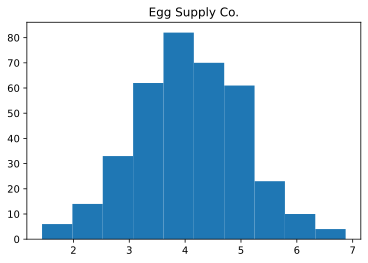

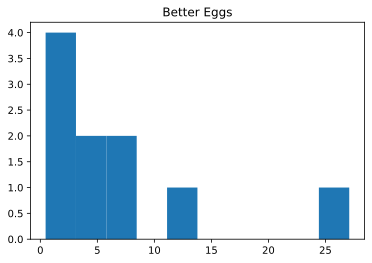

Egg Supply Co. Variance: 0.9484660977815833
Better Egg Variance: 60.09163331231083


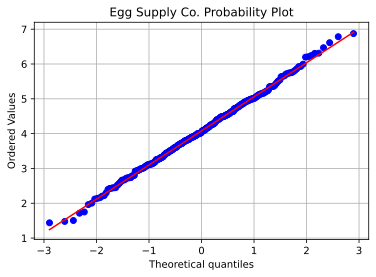

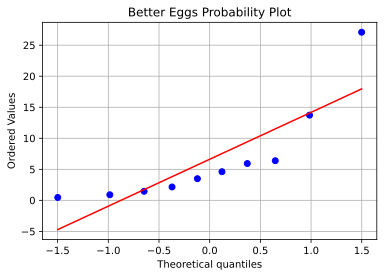

In [117]:
plt.hist(supp1)
plt.title('Egg Supply Co.')
plt.show()
plt.hist(supp2)
plt.title('Better Eggs')
plt.show()
print('Egg Supply Co. Variance:',np.std(supp1)**2)
print('Better Egg Variance:',np.std(supp2)**2)
probplot1=stats.probplot(supp1,plot=plt)
plt.grid()
plt.title('Egg Supply Co. Probability Plot')
plt.show()
probplot2=stats.probplot(supp2,plot=plt)
plt.grid()
plt.title('Better Eggs Probability Plot')
plt.show()

We cant perform a 2 sample t test since the sample variances are very different from each other and Better Egg has a non-normal distribution as shown by the histogram and the nonlinear probability plot.

In [18]:
editmu2=[3.49175603,1.461317125,6.385582414,2.154988984,13.72803641,0.901709321,0.462560951,4.615961925,
       5.930518141]

In [23]:
print(supp1mu,np.mean(editmu2))
#omitting the point at 27.1 gives only a slightly better mean that the first supplier
print('Egg Supply Co Std Dev:',np.std(supp1),'Better Eggs Std Dev:',np.std(supp2))

4.078483924468493 4.3480479223333335
Egg Supply Co Std Dev: 0.9738922413601945 Better Eggs Std Dev: 7.751879340670289


We can find out if the highest data value is an outlier by seeing is the Z score for the point is greater than $\pm$3.

$$
Z=\frac{X-\mu}{\sigma}
$$

$$
Z=\frac{27.08701095-4.34804792}{7.75187934}=\boxed{2.93}
$$

Since the value lies within 3 standard deviations of the mean, we cannot label it an outlier and therefore we must leave it in the set.

## Problem 3:

Restaurant 77 has -3 entrees, so I removed this datapoint as a discrepancy

In [88]:
from statsmodels.formula.api import ols
df=pd.read_csv(r"C:\Users\hayde\Downloads\RatingData.csv")
print(df)
model=ols('rating ~ servers + apps + entrees + desserts + parking + seats + C(valet)', data=df) #C() indicates a categorical var
fitted_model=model.fit()
fitted_model.summary()

    rating  servers  apps  entrees  desserts  parking  seats  valet
0      117        8     5       12         5       17     41      1
1       94        9     4       10         5       23     26      0
2      139        1     6       10         5       25     43      0
3      121       10     4       10         7       24     35      1
4      110        6     3        8         4       22     43      1
..     ...      ...   ...      ...       ...      ...    ...    ...
94     121        8     5        8         6       26     39      1
95     124       11     5       10         4       23     39      0
96     148        9     3       15         6       21     40      0
97     119        9     5        9         6       24     42      0
98     126        7     4       12         6       25     37      0

[99 rows x 8 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     235.5
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           2.00e-55
Time:                        16:21:06   Log-Likelihood:                -335.74
No. Observations:                  99   AIC:                             687.5
Df Residuals:                      91   BIC:                             708.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -115.3495      8.274    -13.941      0.000    -131.785     -98.914
C(valet)[T.1]    -0.9252      1.605     -0.576      0.566      -4.113       2.263
servers           0.2380      0.254      0.937      0.351      -0.267       0.743
apps             -0.2210      0.760     -0.291      0.772      -1.731       1.289
entrees           5.1380      0.305     16.836      0.000       4.532       5.744
desserts         -0.4473      0.695     -0.643      0.522      -1.829       0.934
parking           3.8811      0.163     23.768      0.000       3.557       4.205
seats             2.5486      0.093     27.347      0.000       2.363       2.734
==============================================================================
Omnibus:                        2.833   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                2.611
Skew:                           0.397   Prob(JB):                        0.271
Kurtosis:                       2.957   Cond. No.                         545.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R: rating 

W: waiters

A: appetizers

E: entrees

D: desserts

P: parking spaces

S: seats

V: valet service (categorical variable)

$$
R=-115.3495+0.238W-0.221A+5.138E-0.4473D+3.8811P+2.5486S-0.9252V
$$

Knowing that our restaurant will have 4 waiters, 3 appetizers, 9 entrees, 5 desserts, 38 parking spaces, 54 seats, and no valet service, we can predict our rating by adding these variables to out model:

$$
R=-115.3495-0.238*4-0.221*3+5.138*9-0.4473*5+3.8811*38+2.5486*54-0.9252*0=\boxed{214.0152}
$$

The ratings collected from our fieldwork are whole numbers, so we can round our predicted rating value to 214, which would be the highest rating out of any restaurant studied.

The model represents the data quite well; we have an $R^2$ value of 0.948 and an $R^2_{adj}$ of 0.944.

In [89]:
from statsmodels.formula.api import ols
df=pd.read_csv(r"C:\Users\hayde\Downloads\RatingData.csv")
print(df)
model=ols('rating ~ entrees + parking + seats', data=df) #C() indicates a categorical var
fitted_model=model.fit()
fitted_model.summary()

    rating  servers  apps  entrees  desserts  parking  seats  valet
0      117        8     5       12         5       17     41      1
1       94        9     4       10         5       23     26      0
2      139        1     6       10         5       25     43      0
3      121       10     4       10         7       24     35      1
4      110        6     3        8         4       22     43      1
..     ...      ...   ...      ...       ...      ...    ...    ...
94     121        8     5        8         6       26     39      1
95     124       11     5       10         4       23     39      0
96     148        9     3       15         6       21     40      0
97     119        9     5        9         6       24     42      0
98     126        7     4       12         6       25     37      0

[99 rows x 8 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     559.3
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           3.24e-60
Time:                        17:19:24   Log-Likelihood:                -336.93
No. Observations:                  99   AIC:                             681.9
Df Residuals:                      95   BIC:                             692.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -117.3833      6.206    -18.914      0.000    -129.704    -105.062
entrees        5.0793      0.293     17.364      0.000       4.499       5.660
parking        3.9018      0.151     25.798      0.000       3.602       4.202
seats          2.5519      0.091     28.001      0.000       2.371       2.733
==============================================================================
Omnibus:                        2.304   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                2.133
Skew:                           0.358   Prob(JB):                        0.344
Kurtosis:                       2.926   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted R squared is always lower than the R squared value but will approach the R squared when the variables included in the model improve its predictive capabilities the most. We see a marginal improvement in the difference between the adjusted R squared and the R squared values by removing the variables with the highest p values, and both R squared values also drop by doing this, so including all of the data seems to result in the best model. 

https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp